### Тема: Поиск характеристик и визуализация теоретических законов распределения

**Выполнил**: Лежнин Максим Витальевич (ПМ-31)

**Преподаватель**: Олейник Т.А., кафедра ВМ-1

###### Практическая работа № **1**, вариант № **3**

###### Осенний семестр, 2023 год

###### МИЭТ, Зеленоград

### Библиотеки

In [1]:
import numpy as np
import scipy.stats as sts
import scipy.special as sc
import scipy.integrate as integrate
import matplotlib.pyplot as plt

### Задание 1
1) Изучите распределение Пуассона (при конкретном
значении параметра $\lambda$, которое выберите самостоятельно) по следующему плану:
- двумя способами (непосредственно по формулам и используя класс распределения в языке программирования Python) постройте ряд распределения и визуализируйте его;
- постройте график функции распределения;
- вычислите вероятность попадания случайной величины в несколько промежутков (промежутки выберите самостоятельно);
- используя инструменты языка программирования Python, найдите математическое ожидание, дисперсию, среднее квадратичное отклонение, начальные моменты нескольких порядков; коэффициенты асимметрии и эксцесса; сопоставьте результаты с теоретическими сведениями.
2) Визуализируйте (проиллюстрируйте графически) асимптотическую нормальность закона Пуассона

Формула вероятности в распределении Пуассона:<br>
$$P\{X = k\} = \frac{\lambda^k}{k!}e^{-\lambda}$$

Пусть $\lambda = 12$.

In [2]:
lm = 12

Сначала построим ряд распределения по формулам:

In [3]:
# вероятность по закону Пуассона
P = lambda k: lm ** k / sc.factorial(k) * np.exp(-lm)

# строю ряд распределения
x = [i for i in range(round(2 * lm))]
p = [P(i) for i in x]

# вывод ряда распределения 
print("Ряд распределения\n")
print("k\tP{X = k}")
print("-" * 30)
for i in range(len(x)):
    print(f"{x[i]}\t{p[i]}")

Ряд распределения

k	P{X = k}
------------------------------
0	6.14421235332821e-06
1	7.373054823993851e-05
2	0.0004423832894396311
3	0.0017695331577585243
4	0.005308599473275573
5	0.012740638735861376
6	0.02548127747172275
7	0.043682189951524716
8	0.06552328492728708
9	0.08736437990304943
10	0.10483725588365932
11	0.11436791550944653
12	0.11436791550944653
13	0.1055703835471814
14	0.09048890018329835
15	0.07239112014663868
16	0.054293340109979014
17	0.03832471066586754
18	0.02554980711057836
19	0.01613672028036528
20	0.009682032168219168
21	0.005532589810410953
22	0.003017776260224156
23	0.0015744919618560812


Теперь построим ряд распределения с помощью класса распределения в python:

In [4]:
# определяю объект класса распределения
distribution = sts.poisson(lm)

# функция вероятности
P = lambda k: distribution.pmf(k)

# строю ряд распределения
x = [i for i in range(round(2 * lm))]
p = [P(i) for i in x]

# вывод ряда распределения 
print("Ряд распределения\n")
print("k\tP{X = k}")
print("-" * 30)
for i in range(len(x)):
    print(f"{x[i]}\t{p[i]}")

Ряд распределения

k	P{X = k}
------------------------------
0	6.14421235332821e-06
1	7.373054823993849e-05
2	0.0004423832894396311
3	0.0017695331577585263
4	0.005308599473275576
5	0.012740638735861376
6	0.025481277471722776
7	0.043682189951524654
8	0.06552328492728705
9	0.08736437990304963
10	0.10483725588365922
11	0.11436791550944655
12	0.11436791550944696
13	0.105570383547182
14	0.090488900183298
15	0.07239112014663847
16	0.0542933401099789
17	0.03832471066586755
18	0.02554980711057847
19	0.01613672028036523
20	0.00968203216821916
21	0.005532589810410958
22	0.0030177762602241515
23	0.0015744919618560812


Легко видеть, что оба ряда распределения равны с некоторой незначительной погрешностью.

Теперь визуализируем ряд и функцию распределения:

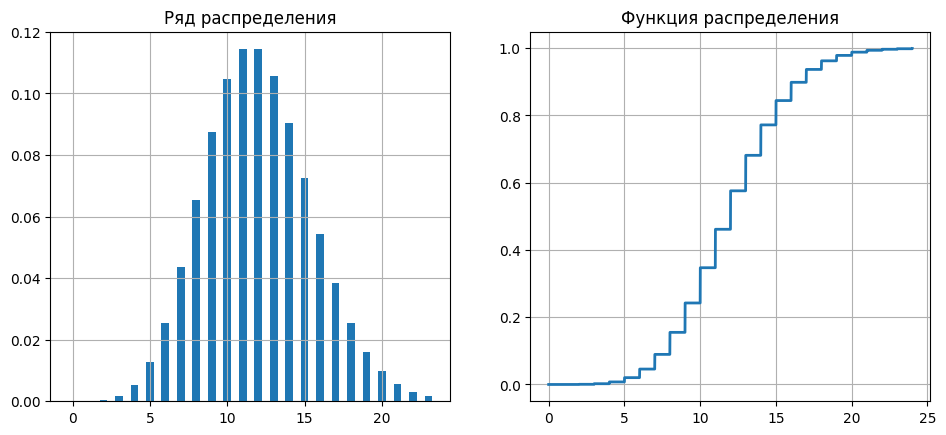

In [5]:
# функция распределения
F = lambda x: distribution.cdf(x)

# определеям объекты классов графика
fig, sub_plt = plt.subplots(1, 2)
plt.subplots_adjust(right=1.5)

# визуализизация ряд распределения
x = [i for i in range(round(2 * lm))]
p = [P(i) for i in x]
sub_plt[0].bar(x, p, width=0.5)
sub_plt[0].set_title('Ряд распределения')
sub_plt[0].grid(True)

# визуализация функции распределения 
x = np.linspace(0, round(2 * lm), 10000)
sub_plt[1].plot(x, F(x), lw=2)
sub_plt[1].set_title('Функция распределения')
sub_plt[1].grid(True)

Посчитаем вероятность попадания случайной величины в несколько разных промежутков. Пусть нам даны следующие промежутки:
$$[-5,\, -3],\ [-1.5,\, 2.5],\ (5,\, 10),\ [0,\, +\infty),\ [10, 20]$$

In [6]:
# наши интервалы
intervals_text = ["[-5, -3]", "[-1.5, 2.5]", "(5, 10)", "[0, +∞)", "[10, 20]"]
intervals = [(-5 - 10 ** -10, -3), (-1.5, 2.5), (5, 10 - 10 ** -10), (0 - 10 ** -10, np.inf), (10 - 10 ** -10, 20)]

# вероятности на данных интервалах
probabilities = [F(y) - F(x) for (x, y) in intervals]

# вывод вероятностей на экран
print("Вероятности попадания случайной величины в соответствующие интервалы:")
for i in range(len(intervals)):
    print(f"P{{X ∈ {intervals_text[i]}}} = {probabilities[i]}")

Вероятности попадания случайной величины в соответствующие интервалы:
P{X ∈ [-5, -3]} = 0.0
P{X ∈ [-1.5, 2.5]} = 0.0005222580500328981
P{X ∈ (5, 10)} = 0.22205113225358405
P{X ∈ [0, +∞)} = 1.0
P{X ∈ [10, 20]} = 0.74601010111468


Пусть X - случайная величина распределенная по пуассоновскому закону $Pu(12)$. Найдем ее теоретические числовые характеристики:
1) Математическое ожидание $M[X] = \nu_1 = \lambda = 12$;
2) Дисперсия $D[X] = \lambda = 12$;
3) Среднее квадратичное отклонение $\sigma_X = \sqrt{\lambda} \approx 3.4641$;
4) 2-ой начальный момент $M[X^2] = \nu_2 = \sum\limits_{k = 0}^{\infty} k^2 \frac{\lambda^k}{k!}e^{-\lambda} = \lambda e^{-\lambda} \sum\limits_{k = 1}^{\infty} k \frac{\lambda^{k - 1}}{(k - 1)!} = \lambda e^{-\lambda} \sum\limits_{k = 0}^{\infty} (k + 1) \frac{\lambda^k}{k!} = \lambda e^{-\lambda}(\lambda e^{\lambda} + e^{\lambda}) = \lambda^2 + \lambda = 156$;
5) 3-ий начальный момент $M[X^3] = \nu_3 = \sum\limits_{k = 0}^{\infty} k^3 \frac{\lambda^k}{k!}e^{-\lambda} = \lambda e^{-\lambda} \sum\limits_{k = 0}^{\infty} (k^2 + 2k + 1) \frac{\lambda^k}{k!} = \lambda e^{-\lambda}((\lambda^2 + \lambda) e^{\lambda} + 2\lambda e^{\lambda} + e^{\lambda}) = \lambda^3 + 3\lambda^2 + \lambda = 2172$;
6) 4-ый начальный момент $M[X^4] = \nu_4 = \sum\limits_{k = 0}^{\infty} k^4 \frac{\lambda^k}{k!}e^{-\lambda} = \lambda e^{-\lambda} \sum\limits_{k = 0}^{\infty} (k^3 + 3k^2 + 3k + 1) \frac{\lambda^k}{k!} = \lambda ((\lambda^3 + 3\lambda^2 + \lambda) + 3(\lambda^2 + \lambda) + 3\lambda + 1) = \lambda^4 + 6\lambda^3 + 7\lambda^2 + \lambda = 32124;$
7) Коэффициент асимметрии $a_s = \frac{\mu_3}{\sigma^3} = \frac{\nu_3 - 3\nu_2\nu_1 + 2\nu_1^3}{\sigma^3} = \frac{\lambda^3 + 3\lambda^2 + \lambda - 3\lambda(\lambda^2 + \lambda) + 2\lambda^3}{\lambda\sqrt{\lambda}} = \frac{1}{\sqrt{\lambda}} \approx 0.2887$;
8) Коэффициент эксцесса $e_s = \frac{\mu_4}{\sigma^4} - 3 = \frac{\nu^4 - 4\nu_3\nu_1 + 6\nu_2\nu_1^2 - 3\nu_1^4}{\sigma^4} - 3 = \frac{\lambda^4 + 6\lambda^3 + 7\lambda^2 + \lambda - 4\lambda(\lambda^3 + 3\lambda^2 + \lambda) + 6\lambda^2(\lambda^2 + \lambda) - 3\lambda^4}{\lambda^2} - 3 = \frac{1}{\lambda} \approx 0.0833$

Теперь найдем эти характеристики с помощью python и сравним значения:

In [7]:
# характеристики
raw_moment = [distribution.moment(i) for i in range(1, 5)]
variance = distribution.var()
standart_deviation = np.sqrt(variance)
skewness, excess_kurtosis = distribution.stats('sk')

# вывод на экран
print(f"""Характеристики:\n
      Математическое ожидание: {raw_moment[0]}\n
      Дисперсия: {variance}\n
      Среднее квадратичное отклонение: {standart_deviation}\n
      2-ой начальный момент: {raw_moment[1]}\n
      3-ий начальный момент: {raw_moment[2]}\n
      4-ый начальный момент: {raw_moment[3]}\n
      Коэффициент асимметрии: {skewness}\n
      Коэффициент эксцесса: {excess_kurtosis}\n""")

Характеристики:

      Математическое ожидание: 12.0

      Дисперсия: 12.0

      Среднее квадратичное отклонение: 3.4641016151377544

      2-ой начальный момент: 156.0

      3-ий начальный момент: 2172.0

      4-ый начальный момент: 32124.0

      Коэффициент асимметрии: 0.28867513459481287

      Коэффициент эксцесса: 0.08333333333333333



Значения совпадают, все хорошо. Теперь покажем асимптотическую нормальность закона Пуассона:

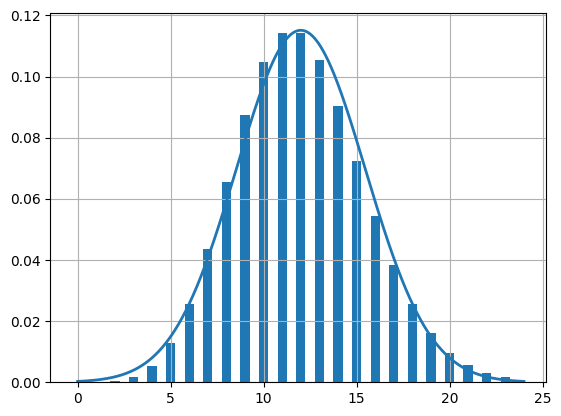

In [8]:
# зададим нормальный закон с матожиданием и средним квадратичным отклонением нашего распределения Пуассона
norm_distribution = sts.norm(raw_moment[0], standart_deviation)

# функция плотности вероятности нормального распределения
f = lambda x: norm_distribution.pdf(x)

# визуализируем ряд распределения Пуассона и функцию плотности нормального распределения
x = [i for i in range(round(2 * lm))]
p = [P(i) for i in x]
plt.bar(x, p, width=0.5)
x = np.linspace(0, 2*lm, 10000)
plt.plot(x, f(x), lw=2)
plt.grid(True)

### Задание 2
1) Изучите показательное распределение $Ex(\lambda)$ (при конкретном выбранном вами значении параметра $\lambda$) по следующему плану:
- постройте график плотности распределения вероятностей (двумя способами: непосредственно по формулам и используя класс распределения в языке программирования Python);
- постройте график функции распределения вероятностей (двумя способами: непосредственно по формулам и используя класс распределения в языке программирования Python);
- вычислите вероятность попадания случайной величины в какой-нибудь промежуток (границы промежутка выберите самостоятельно) двумя способами (через функцию распределения и через плотность распределения), а также найдите квантили порядка 0.25, 0.5, 0.75, 0.95;
- найдите математическое ожидание, дисперсию, среднее квадратичное отклонение, начальные моменты нескольких порядков, коэффициенты асимметрии и эксцесса двумя способами (используя теоретические формулы и готовые методы языка программирования Python); сопоставьте результаты с теоретическими сведениями.
2) Визуализируйте и прокомментируйте зависимость функции распределения и плотности показательного распределения $Ex(\lambda)$ от параметра

Функция плотности вероятности в показательном распределении:<br>
$$
f_X(x) = 
\begin{cases}
    0,\ x \in (-\infty,\, 0],\\
    \lambda e^{-\lambda x},\ x \in (0,\, +\infty)
\end{cases}
$$

Проинтегрировав ее по $x$, получим функцию распределения:<br>
$$
F_X(x) = 
\begin{cases}
    0,\ x \in (-\infty,\, 0],\\
    1 - e^{-\lambda x},\ x \in (0,\, +\infty)
\end{cases}
$$

Пусть $\lambda = 0.25$.

In [9]:
lm = 0.25

Построим по формулам графики функций плотности и распределения:

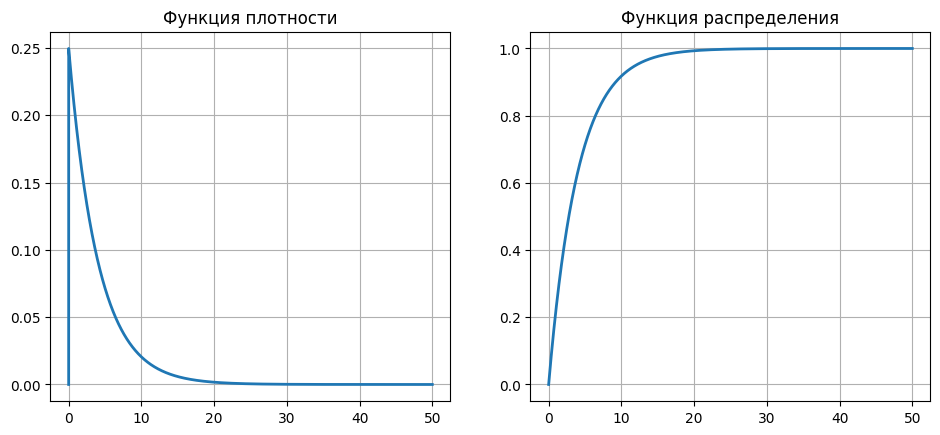

In [10]:
# функция плотности вероятности
f = lambda x: 0 if x <= 0 else lm * np.exp(-lm * x)

# функция распределения
F = lambda x: 0 if x <= 0 else 1 - np.exp(-lm * x)

# рассматриваемый отрезок x
x = np.linspace(0, 50, 10000)

# определеям объекты классов графика
fig, sub_plt = plt.subplots(1, 2)
plt.subplots_adjust(right=1.5)

# визуализация функции плотности
f_x = [f(i) for i in x]
sub_plt[0].plot(x, f_x, lw=2)
sub_plt[0].set_title('Функция плотности')
sub_plt[0].grid(True)

# визуализация функции распределения
F_x = [F(i) for i in x]
sub_plt[1].plot(x, F_x, lw=2)
sub_plt[1].set_title('Функция распределения')
sub_plt[1].grid(True)

Теперь построим графики функций плотности и распределения, используя класс распределения в python:

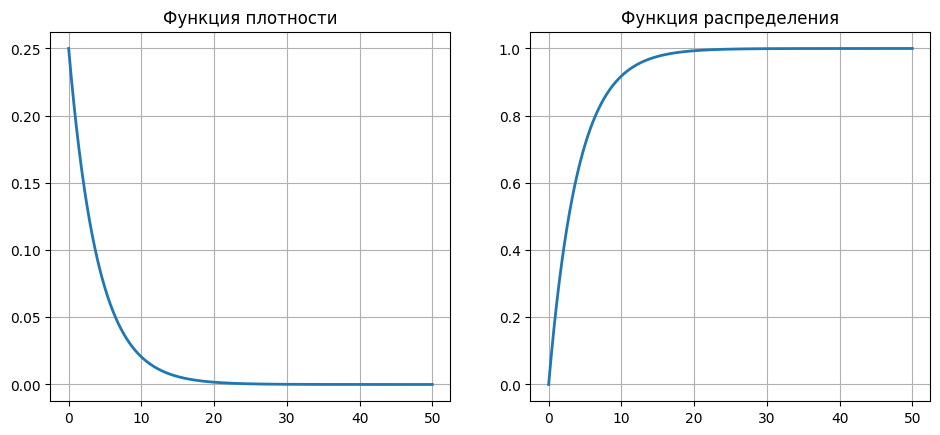

In [11]:
# объект класса распределения
distribution = sts.expon(0, 1 / lm)

# функция плотности
f = lambda x: distribution.pdf(x)

# функция распределения
F = lambda x: distribution.cdf(x)

# рассматриваемый отрезок x
x = np.linspace(0, 50, 10000)

# определеям объекты классов графика
fig, sub_plt = plt.subplots(1, 2)
plt.subplots_adjust(right=1.5)

# визуализация функции плотности
sub_plt[0].plot(x, f(x), lw=2)
sub_plt[0].set_title('Функция плотности')
sub_plt[0].grid(True)

# визуализация функции распределения
sub_plt[1].plot(x, F(x), lw=2)
sub_plt[1].set_title('Функция распределения')
sub_plt[1].grid(True)

Как видим, разницы в графиках нет, кроме значения функции плотности в точке $x = 0$.

Посчитаем вероятность попадания случайной величины в промежуток $(2, 10)$. Сначала с помощью функции распределения, потом через плотность вероятности. 

In [12]:
# через функцию распределения
print(f"P{{5 < X < 10}} = F(10) - F(2) = {F(10) - F(2)}")

# через функцию плотности
print(f"P{{5 < X < 10}} = \int_2^10 f(x)dx = {integrate.quad(f, 2, 10)[0]}")

P{5 < X < 10} = F(10) - F(2) = 0.5244456610887346
P{5 < X < 10} = \int_2^10 f(x)dx = 0.5244456610887346


Найдем квантили порядков 0.25, 0.5, 0.75, 0.95:

In [13]:
p = [0.25, 0.5, 0.75, 0.95]
q = [distribution.ppf(i) for i in p]
for i in range(len(p)):
    print(f"Квантиль порядка {p[i]}: {q[i]}")

Квантиль порядка 0.25: 1.1507282898071236
Квантиль порядка 0.5: 2.772588722239781
Квантиль порядка 0.75: 5.545177444479562
Квантиль порядка 0.95: 11.98292909421596


Пусть X - случайная величина распределенная по пуассоновскому закону $Ex(0.25)$. Найдем ее теоретические числовые характеристики:
1) Математическое ожидание $M[X] = \nu_1 = \frac{1}{\lambda} = 4$;
2) Дисперсия $D[X] = \frac{1}{\lambda^2} = 16$;
3) Среднее квадратичное отклонение $\sigma_X = \frac{1}{\lambda} = 4$;
4) n-ый начальный момент
$\begin{align*}
M[X^n] = \int\limits_{-\infty}^{\infty} x^n f_X(x)\, dx = \int\limits_{0}^{\infty} x^n \lambda e^{-\lambda x}\, dx = (\text{DI-метод}) = \left.-x^n e^{-\lambda x}\right|_{0}^{+\infty} - \left.nx^{n - 1} \frac{e^{-\lambda x}}{\lambda}\right|_{0}^{+\infty} -\ ...\ +\ \left.(-1)^nn! * (-1)^{n + 1} \frac{e^{-\lambda x}}{\lambda^n}\right|_{0}^{+\infty} = \\ = \left.-\frac{n!}{\lambda^n}e^{-\lambda x}\right|_{0}^{+\infty} = \frac{n!}{\lambda^n};
\end{align*}$
В частности $M[X^2]= \nu_2 = 32,\ M[X^3] = \nu_3 = 384,\ M[X^4] = \nu_4 = 6144$;
6) Коэффициент асимметрии $a_s = \frac{\mu_3}{\sigma^3} = \frac{\nu_3 - 3\nu_2\nu_1 + 2\nu_1^3}{\sigma^3} = 2$;
7) Коэффициент эксцесса $e_s = \frac{\mu_4}{\sigma^4} - 3 = \frac{\nu^4 - 4\nu_3\nu_1 + 6\nu_2\nu_1^2 - 3\nu_1^4}{\sigma^4} - 3 = 6$

Теперь найдем эти характеристики с помощью python и сравним значения:

In [14]:
# характеристики
raw_moment = [distribution.moment(i) for i in range(1, 5)]
variance = distribution.var()
standart_deviation = np.sqrt(variance)
skewness, excess_kurtosis = distribution.stats('sk')

# вывод на экран
print(f"""Характеристики:\n
      Математическое ожидание: {raw_moment[0]}\n
      Дисперсия: {variance}\n
      Среднее квадратичное отклонение: {standart_deviation}\n
      2-ой начальный момент: {raw_moment[1]}\n
      3-ий начальный момент: {raw_moment[2]}\n
      4-ый начальный момент: {raw_moment[3]}\n
      Коэффициент асимметрии: {skewness}\n
      Коэффициент эксцесса: {excess_kurtosis}\n""")

Характеристики:

      Математическое ожидание: 4.0

      Дисперсия: 16.0

      Среднее квадратичное отклонение: 4.0

      2-ой начальный момент: 32.0

      3-ий начальный момент: 384.0

      4-ый начальный момент: 6144.0

      Коэффициент асимметрии: 2.0

      Коэффициент эксцесса: 6.0



Все значения совпали. Теперь визуализируем показательный закон при разных параметрах $\lambda$. Рассмотрим 3 значения:
1) $\lambda = 0.25$ - зеленый цвет линии;
2) $\lambda = 1$ - синий цвет линии;
3) $\lambda = 4$ - красный цвет линии

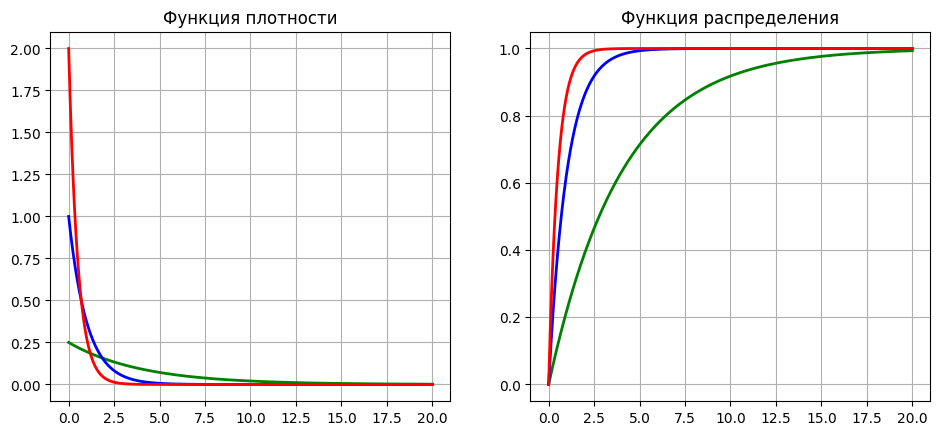

In [15]:
# листы значений параметров и соответствующих им цветов
lm = [0.25, 1, 2]
cl = ["g", "b", "r"]

# лист объектов класса распределения
distributions = [sts.expon(0, 1/i) for i in lm]

# функция плотности
f = lambda i, x: distributions[i].pdf(x)

# функция вероятности
F = lambda i, x: distributions[i].cdf(x)

# рассматриваемый отрезок x
x = np.linspace(0, 20, 1000)

# определеям объекты классов графика
fig, sub_plt = plt.subplots(1, 2)
plt.subplots_adjust(right=1.5)

# визуализация функции плотности
sub_plt[0].set_title('Функция плотности')
sub_plt[0].grid(True)
for i in range(len(lm)):
    f_x = [f(i, j) for j in x]
    sub_plt[0].plot(x, f_x, lw=2, color=cl[i])

# визуализация функции распределения
sub_plt[1].set_title('Функция распределения')
sub_plt[1].grid(True)
for i in range(len(lm)):
    F_x = [F(i, j) for j in x]
    sub_plt[1].plot(x, F_x, lw=2, color=cl[i])  

На графиках четко видно, что при увеличении параметра $\lambda$ график становится более резким в начале, то есть прозводные этих функций будут по модулю больше у тех распределений, у которых параметр больше. Для плотности также легко заметить, что $\lim\limits_{x \to 0+0} f(x) = \lambda$.

### Задание 3
Исследуйте логнормальное распределение по следующему плану:
1) опишите практические ситуации, в математических моделях которых используется данное распределение;
2) постройте в одной системе координат график плотности распределения вероятностей, в другой – график функции распределения при нескольких значениях параметров;
3) при выбранных в п. 2 значениях параметров вычислите следующие числовые характеристики распределений (если они существуют): математическое ожидание, дисперсию, среднее квадратичное отклонение, коэффициенты асимметрии и эксцесса. Прокомментируйте связь числовых коэффициентов с видом графика плотности распределения;
4) вычислите вероятность попадания случайной величины в какой-нибудь промежуток (границы промежутка выберите самостоятельно) двумя способами (через функцию распределения и через плотность распределения), а также найдите квантили порядка 0.25, 0.5, 0.75, 0.95;
5) визуализируйте и прокомментируйте связь с другими распределениями (если она имеется)

Количество практических ситуаций, в которых применимо логнормальное распределение, очень много. Начиная от длины сообщений в чатах и форумах, заканчивая распределением астероидов в солнечной системе по их размерам. В качестве забавного факта можно привести то, что длина шахматной партии тоже подчинается логнормальному распределению.

Пусть у нас есть следующие значения параметров:
1) $\mu = 0,\ \sigma = 0.5$ - линии зеленого цвета;
2) $\mu = 0,\ \sigma = 2$ - линии синего цвета;
3) $\mu = 0.5,\ \sigma = 0.5$ - линии красного цвета;

Построим графики плотности и закона распределения.

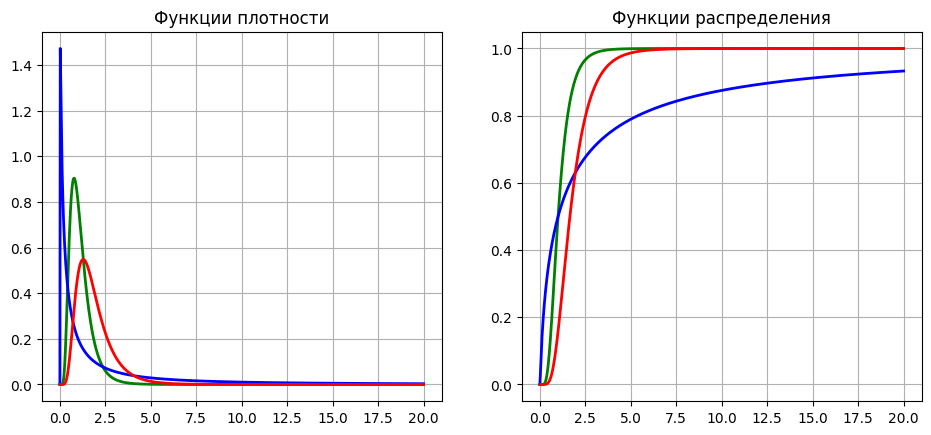

In [16]:
# листы значений параметров и соотвествующих им цветов
mu = [0, 0, 0.5]
sig = [0.5, 2, 0.5]
cl = ["g", "b", "r"]

# рассматриваемый отрезок x
x = np.linspace(0.00001, 20, 1000)

# определеям объекты классов графика
fig, sub_plt = plt.subplots(1, 2)
plt.subplots_adjust(right=1.5)
sub_plt[0].set_title("Функции плотности")
sub_plt[0].grid(True)
sub_plt[1].set_title("Функции распределения")
sub_plt[1].grid(True)

# визуализация функций плотности и распределения
for i in range(len(mu)):
    # объект класса распределения
    distribution = sts.lognorm(s=sig[i], scale=np.exp(mu[i]))
    
    # функция плотности
    f = lambda x: distribution.pdf(x)
    sub_plt[0].plot(x, f(x), lw=2, color=cl[i])

    # функция распределения
    F = lambda x: distribution.cdf(x)
    sub_plt[1].plot(x, F(x), lw=2, color=cl[i])

Теперь вычислим некоторые числовые характеристики для этих распределений:

In [17]:
# параметры
mu = [0, 0, 0.5]
sig = [0.5, 2, 0.5]

for i in range(len(mu)):
    # объект класса распределения
    distribution = sts.lognorm(s=sig[i], scale=np.exp(mu[i]))

    # характеристики
    expected_value = distribution.mean()
    variance = distribution.var()
    standart_deviation = np.sqrt(variance)
    skewness, excess_kurtosis = distribution.stats('sk')

    # вывод на экран
    print(f"""Характеристики (при μ = {mu[i]}, σ = {sig[i]}):\n
          Математическое ожидание: {expected_value}\n
          Дисперсия: {variance}\n
          Среднее квадратичное отклонение: {standart_deviation}\n
          Коэффициент асимметрии: {skewness}\n
          Коэффициент эксцесса: {excess_kurtosis}\n\n""")

Характеристики (при μ = 0, σ = 0.5):

          Математическое ожидание: 1.1331484530668263

          Дисперсия: 0.3646958540123865

          Среднее квадратичное отклонение: 0.6039005332108811

          Коэффициент асимметрии: 1.7501896550697178

          Коэффициент эксцесса: 5.898445673784778


Характеристики (при μ = 0, σ = 2):

          Математическое ожидание: 7.38905609893065

          Дисперсия: 2926.359837008584

          Среднее квадратичное отклонение: 54.095839368740585

          Коэффициент асимметрии: 414.359343300147

          Коэффициент эксцесса: 9220556.977307005


Характеристики (при μ = 0.5, σ = 0.5):

          Математическое ожидание: 1.8682459574322225

          Дисперсия: 0.9913461128762231

          Среднее квадратичное отклонение: 0.9956636544919288

          Коэффициент асимметрии: 1.7501896550697178

          Коэффициент эксцесса: 5.898445673784778




Можно заметить, что коэффициент эксцесса у синего графика очень большой. Этот коэффициент отвечает за "остроту пика" функции плотности. В сравнении с двумя другими графиками синий действительно очень острый - сначала резко поднимется, а потом так же резко спадает.

Аналогично у синего графика зашкаливает коэффициент асимметрии, который характеризует "асимметричность графика". Самое маленькое значение этой характеристики у зеленого графика - он действительно выглядит наиболее симметричным среди всех. 

Возьмем распределение с параметрами $\mu = 1,\ \sigma = 1$. Посчитаем вероятность попадания случайной величины в интервале $(1,\ 5)$ двумя способами:

In [18]:
# параметры
mu = 1
sig = 1

# объект класса распределения
distribution = sts.lognorm(s=sig, scale=np.exp(mu))

# функция распределения
F = lambda x: distribution.cdf(x)

# функция плотности
f = lambda x: distribution.pdf(x)

# вычисленные вероятности
print(f"P{{1 < X < 5}} = F(5) - F(1) = {F(5) - F(1)}")
print(f"P{{1 < X < 5}} = \int_1^5 f(x)dx = {integrate.quad(f, 1, 5)[0]}")

P{1 < X < 5} = F(5) - F(1) = 0.5702276387216607
P{1 < X < 5} = \int_1^5 f(x)dx = 0.5702276387216608


Посчитаем квантили порядков 0.25, 0.5, 0.75, 0.95:

In [19]:
p = [0.25, 0.5, 0.75, 0.95]
q = [distribution.ppf(i) for i in p]
for i in range(len(p)):
    print(f"Квантиль порядка {p[i]}: {q[i]}")

Квантиль порядка 0.25: 1.384737027546682
Квантиль порядка 0.5: 2.718281828459045
Квантиль порядка 0.75: 5.336071724767648
Квантиль порядка 0.95: 14.081383797195853


У этого распределения есть очевидная связь с нормальным распределением. Если $X \sim N(m,\ \sigma^2)$, то довольно легко получить случайную величину $Y \sim LN(m, \sigma^2)$. Связь следующая:
$$Y = e^{m + \sigma Y}$$

### Задание 4
Исследуйте распределение (распределение Фишера) по следующему плану:
1) опишите практические ситуации, в математических моделях которых используется данное распределение;
2) постройте в одной системе координат график плотности распределения, в другой – график функции распределения при нескольких значениях параметров;
3) при выбранных в п. 2 значениях параметров вычислите следующие числовые характеристики распределений (если они существуют): математическое ожидание, дисперсию, среднее квадратичное отклонение, коэффициенты асимметрии и эксцесса. Прокомментируйте связь числовых коэффициентов с видом графика плотности распределения;
4) при выбранных в п. 2 значениях параметров вычислите вероятность отклонения случайной величины от математического ожидания на величину $k\sigma\, (k = 1,\, 2,\, 3)$;
5) при выбранных в п. 2 значениях параметров найдите квантили порядка 0.25, 0.5, 0.75, 0.9 ;
6) визуализируйте и прокомментируйте связь с другими распределениями (если она имеется).

Распределение Фишера используется для проверки статистических гипотез. В частности, существует F-тест (или критерий Фишера), который применяется, например, для сравнения дисперсий двух нормальных распределений.

Пусть у нас есть следующие значения параметров:
1) $d_1 = 2,\ d_2 = 1$ - линии зеленого цвета;
2) $d_1 = 10,\ d_2 = 1$ - линии синего цвета;
3) $d_1 = 20,\ d_2 = 20$ - линии красного цвета;

Построим графики плотности и закона распределения.

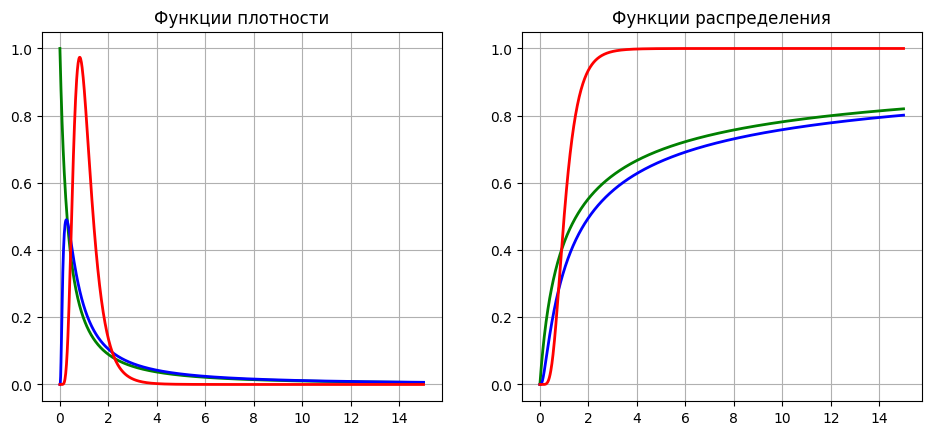

In [20]:
# листы значений параметров и их цветов
d1 = [2, 10, 20]
d2 = [1, 1, 20]
cl = ["g", "b", "r"]

# рассматриваемый отрезок x
x = np.linspace(0.00001, 15, 1000)

# определеям объекты классов графика
fig, sub_plt = plt.subplots(1, 2)
plt.subplots_adjust(right=1.5)
sub_plt[0].set_title("Функции плотности")
sub_plt[0].grid(True)
sub_plt[1].set_title("Функции распределения")
sub_plt[1].grid(True)

# визуализация функций плотности и распределения
for i in range(len(d1)):
    # объект класса распределения
    distribution = sts.f(d1[i], d2[i])
    
    # функция плотности
    f = lambda x: distribution.pdf(x)
    sub_plt[0].plot(x, f(x), lw=2, color=cl[i])

    # функция распределения
    F = lambda x: distribution.cdf(x)
    sub_plt[1].plot(x, F(x), lw=2, color=cl[i])

Далее будем рассматривать красное распределение, то есть с параметрами $d_1 = 20,\, d_2 = 20$ (у остальных характеристики неопределены). Вычислим некоторые числовые характеристики для этого распределения:

In [21]:
# параметры
d1 = 20
d2 = 20

# объект класса распределения
distribution = sts.f(d1, d2)

# характеристики
expected_value = distribution.mean()
variance = distribution.var()
standart_deviation = np.sqrt(variance)
skewness, excess_kurtosis = distribution.stats('sk')

# вывод на экран
print(f"""Характеристики:\n
      Математическое ожидание: {expected_value}\n
      Дисперсия: {variance}\n
      Среднее квадратичное отклонение: {standart_deviation}\n
      Коэффициент асимметрии: {skewness}\n
      Коэффициент эксцесса: {excess_kurtosis}\n""")

Характеристики:

      Математическое ожидание: 1.1111111111111112

      Дисперсия: 0.2932098765432099

      Среднее квадратичное отклонение: 0.5414885747116092

      Коэффициент асимметрии: 1.7001926977411126

      Коэффициент эксцесса: 6.058646616541354



Посчитаем вероятности отклонения случайной величины от ее математического ожидания на $k\sigma\, (k = 1,\, 2,\, 3)$:

In [22]:
# функция распределения
F = lambda x: distribution.cdf(x)

# считаем вероятности
for k in range(1, 4):
    print(f"P{{|X - M[X]| < {k}*σ}} = F(M[X] + {k}*σ) - F(M[X] - {k}*σ) = {F(expected_value + k * standart_deviation) - F(expected_value - k * standart_deviation)}")

P{|X - M[X]| < 1*σ} = F(M[X] + 1*σ) - F(M[X] - 1*σ) = 0.756684636442946
P{|X - M[X]| < 2*σ} = F(M[X] + 2*σ) - F(M[X] - 2*σ) = 0.956727259711079
P{|X - M[X]| < 3*σ} = F(M[X] + 3*σ) - F(M[X] - 3*σ) = 0.9853149396282677


Посчитаем квантили порядков 0.25, 0.5, 0.75, 0.9:

In [23]:
p = [0.25, 0.5, 0.75, 0.9]
q = [distribution.ppf(i) for i in p]
for i in range(len(p)):
    print(f"Квантиль порядка {p[i]}: {q[i]}")

Квантиль порядка 0.25: 0.7363719656676418
Квантиль порядка 0.5: 1.0000000000000004
Квантиль порядка 0.75: 1.3580093303706045
Квантиль порядка 0.9: 1.7938433065702972


Данное распределение связано с распределением Хи-квадрат. Если $X \sim \chi_{d_1}^2,\, Y \sim \chi_{d_2}^2$, то:
$$\frac{X / d_1}{Y / d_2} \sim F(d_1,\, d_2)$$